In [10]:
# libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pandas as pd

In [11]:
# loading data
# split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
# Scale images to the [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0
# Make sure images have shape (784)
x_train = x_train.reshape(60000,-1)
x_test = x_test.reshape(10000,-1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [14]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(100, activation='relu', input_shape=(784,)),
    Dropout(0.1),  
    Dense(50, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model.summary()

c:\Users\MNIST_Digit_Classification\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [31]:
model_=model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test),callbacks=[early_stopping])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6405 - loss: 1.1877 - val_accuracy: 0.9063 - val_loss: 0.3374
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8857 - loss: 0.3940 - val_accuracy: 0.9255 - val_loss: 0.2586
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9098 - loss: 0.3087 - val_accuracy: 0.9375 - val_loss: 0.2177
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9229 - loss: 0.2622 - val_accuracy: 0.9436 - val_loss: 0.1922
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9302 - loss: 0.2320 - val_accuracy: 0.9468 - val_loss: 0.1724
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9372 - loss: 0.2110 - val_accuracy: 0.9525 - val_loss: 0.1570
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9439 - loss: 0.1910 - val_accuracy: 0.9554 - val_loss: 0.1460
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9478 - loss: 0.1767 - 

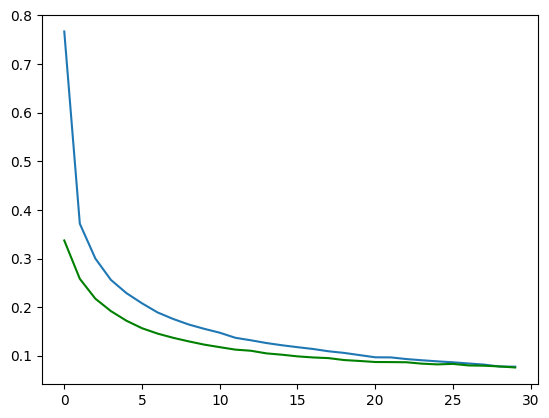

In [32]:
import matplotlib.pyplot as plt 

plt.plot(model_.history['loss'])
plt.plot(model_.history['val_loss'], color='g')

ACCURACY =  0.9762

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(x_test)

y_test1 = np.argmax(y_test, axis=1)

y_pred1_ = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test1, y_pred1_)

print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
[[ 967    0    0    3    1    2    3    1    3    0]
 [   0 1124    2    2    0    1    2    0    4    0]
 [   4    2 1009    5    1    0    3    4    4    0]
 [   0    0    4  986    1    5    0    6    7    1]
 [   1    0    2    0  963    0    6    2    1    7]
 [   3    1    0   10    1  863    5    1    6    2]
 [   4    2    1    0    3    4  940    0    4    0]
 [   1    6    7    6    0    0    0 1002    1    5]
 [   3    2    1    6    2    6    6    4  942    2]
 [   3    3    0    7   15    3    1    7    4  966]]


In [35]:
from sklearn.metrics import classification_report
classr=classification_report(y_pred1_,y_test1)
print(classr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       986
           1       0.99      0.99      0.99      1140
           2       0.98      0.98      0.98      1026
           3       0.98      0.96      0.97      1025
           4       0.98      0.98      0.98       987
           5       0.97      0.98      0.97       884
           6       0.98      0.97      0.98       966
           7       0.97      0.98      0.98      1027
           8       0.97      0.97      0.97       976
           9       0.96      0.98      0.97       983

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

